In [30]:
import numpy as np
import matplotlib.pyplot as plt
import palettable, pickle
%matplotlib inline
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import FixedLocator

In [31]:
DATA_DIRECTOY = "/run/media/sebastian/shoerl_data/mode_choice_paper"

In [32]:
modes = ["car", "pt", "bike", "walk"]
labels = ["Private Car", "Public Transport", "Cycling", "Walking"]
colors = palettable.tableau.Tableau_10.mpl_colors
alphas = [1.0, 1.0, 0.4, 0.4]

In [33]:
plan_data = pickle.load(open("%s/plots/plan_constrained/output.p" % DATA_DIRECTOY, "rb"))
trip_data = pickle.load(open("%s/plots/trip_constrained/output.p" % DATA_DIRECTOY, "rb"))
advanced_data = pickle.load(open("%s/plots/advanced_constrained/output.p" % DATA_DIRECTOY, "rb"))
plan_uc_data = pickle.load(open("%s/plots/plan_unconstrained/output.p" % DATA_DIRECTOY, "rb"))
trip_uc_data = pickle.load(open("%s/plots/trip_unconstrained/output.p" % DATA_DIRECTOY, "rb"))
advanced_uc_data = pickle.load(open("%s/plots/advanced_unconstrained/output.p" % DATA_DIRECTOY, "rb"))

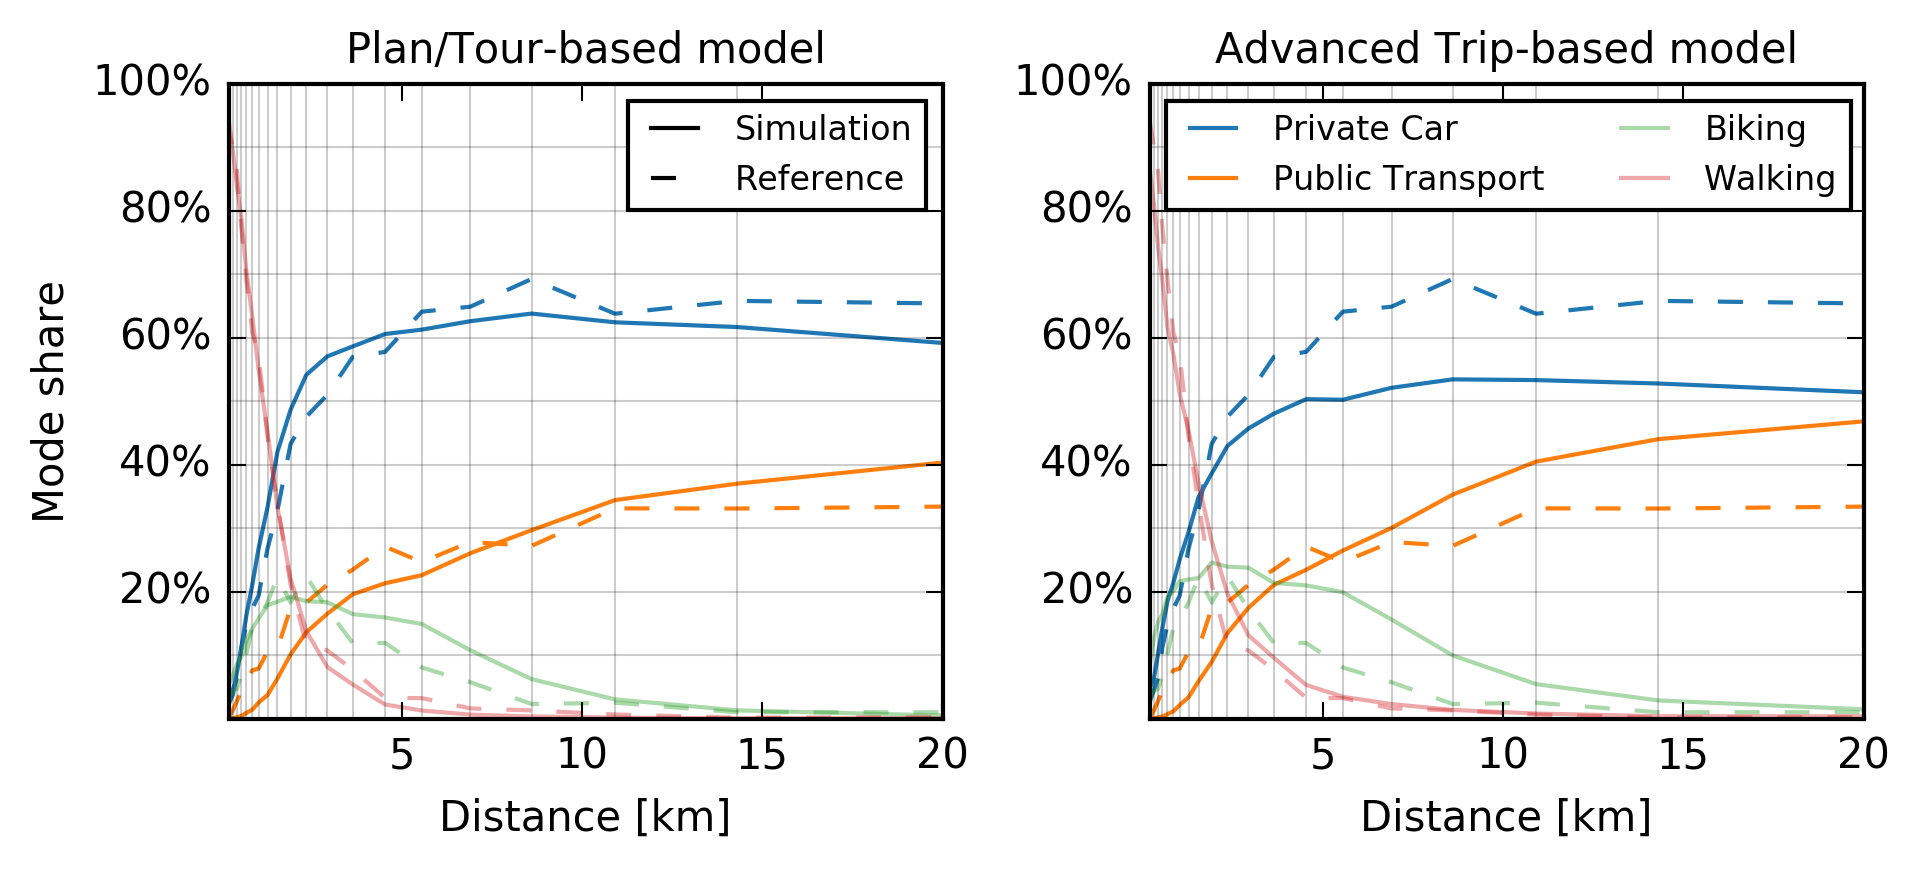

In [34]:
plt.figure(dpi = 300, figsize = (6.5, 3))
bounds = plan_data["bounds_by_distance"]

datas = [plan_data, advanced_data]
titles = [
    "Plan/Tour-based model", "Advanced Trip-based model"
]

for j, data in enumerate(datas):
    plt.subplot(1, 2, j + 1)

    for i in range(len(modes)):
        mode = modes[i]

        mz_share = plan_data["mode_share_by_distance"][mode]["mz"][:-1] / plan_data["totals_mz_by_distance"][:-1]
        share = data["mode_share_by_distance"][mode]["simulation"][:-1] / data["totals_simulation_by_distance"][:-1]

        plt.plot(bounds[1:], mz_share, color = colors[i], alpha = alphas[i], linestyle = "--", label = "Reference")
        plt.plot(bounds[1:], share, color = colors[i], alpha = alphas[i])
        
    for bound in bounds[1:]:
        plt.plot([bound, bound], [0.0, 1.0], 'k', linewidth = 0.5, alpha = 0.2)

    for i in range(10):
        plt.plot([0, bounds[-1]], [i * 0.1, i * 0.1], 'k', linewidth = 0.5, alpha = 0.2)

    plt.xlabel("Distance [km]")
    if j == 0: plt.ylabel("Mode share")
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: ("%.0f%%" % (100.0 * x)) if x > 0 else ""))
    plt.xlim([bounds[1], bounds[-1]])
    plt.title(titles[j], fontsize = 10)
    
    if j == 1:
        plt.legend(handles = [
            plt.plot([0.0, 0.0], [0.0, 0.0], color = colors[0], alpha = alphas[0], label = "Private Car")[0],
            plt.plot([0.0, 0.0], [0.0, 0.0], color = colors[1], alpha = alphas[1], label = "Public Transport")[0],
            plt.plot([0.0, 0.0], [0.0, 0.0], color = colors[2], alpha = alphas[2], label = "Biking")[0],
            plt.plot([0.0, 0.0], [0.0, 0.0], color = colors[3], alpha = alphas[3], label = "Walking")[0]
            ], loc = "best", ncol = 2, fontsize = 8
        )
    else:
        solid_line, = plt.plot([0.0, 0.0], [0.0, 0.0], 'k-', label = "Simulation")
        dashed_line, = plt.plot([0.0, 0.0], [0.0, 0.0], 'k--', label = "Reference")
        plt.legend(handles = [solid_line, dashed_line], fontsize = 8)

plt.tight_layout()
plt.savefig("plots/comparison_plan_vs_trip.pdf")

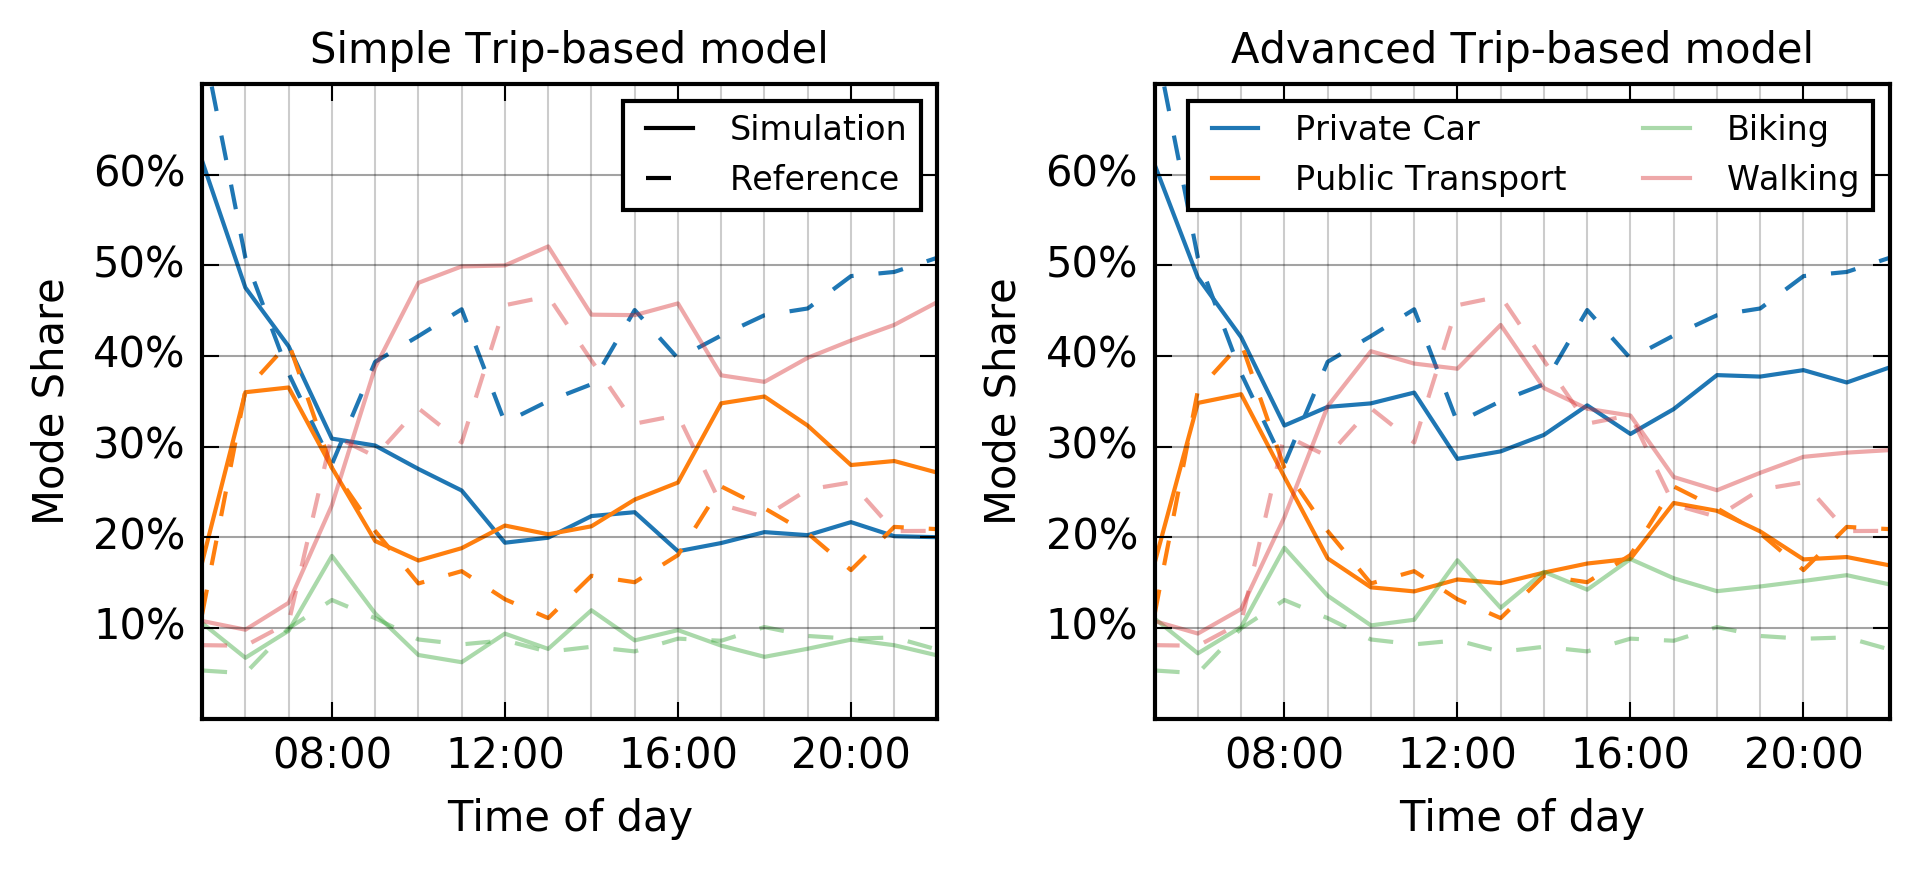

In [35]:
plt.figure(dpi = 300, figsize = (6.5, 3))
bounds = plan_data["bounds_daytime"]

datas = [trip_data, advanced_data]
titles = [
    "Simple Trip-based model", "Advanced Trip-based model"
]

for j, data in enumerate(datas):
    plt.subplot(1, 2, j + 1)

    for i in range(len(modes)):
        mode = modes[i]

        mz_share = plan_data["mode_share_by_daytime"][mode]["mz"][:-1] / plan_data["totals_by_daytime"]["mz"][:-1]
        share = data["mode_share_by_daytime"][mode]["simulation"][:-1] / data["totals_by_daytime"]["simulation"][:-1]

        plt.plot(bounds[1:], mz_share, color = colors[i], alpha = alphas[i], linestyle = "--", label = "Reference")
        plt.plot(bounds[1:], share, color = colors[i], alpha = alphas[i])
        
    for bound in bounds[1:]:
        plt.plot([bound, bound], [0.0, 1.0], 'k', linewidth = 0.5, alpha = 0.2)

    for i in range(10):
        plt.plot([0, bounds[-1]], [i * 0.1, i * 0.1], 'k', linewidth = 0.5, alpha = 0.2)

    #plt.xlabel("Distance [km]")
    #if j == 0: plt.ylabel("Mode share")
    #plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: ("%.0f%%" % (100.0 * x)) if x > 0 else ""))
    #plt.xlim([bounds[1], bounds[-1]])
    plt.title(titles[j], fontsize = 10)
    
    for i in range(10):
        plt.plot([0, bounds[-1]], [i * 0.1, i * 0.1], 'k', linewidth = 0.5, alpha = 0.2)

    plt.ylabel("Mode Share")
    plt.xlim([bounds[1], bounds[-1]])
    plt.ylim([0, 0.7])
    plt.xlabel("Time of day")
    
    plt.gca().xaxis.set_major_locator(FixedLocator(np.arange(0, 100) * 3600 * 4))
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: "%02d:%02d" % (x // 3600, (x % 3600) // 60) if x > 0 else ""))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: ("%.0f%%" % (100.0 * x)) if x > 0 else ""))

    if j == 1:
        plt.legend(handles = [
            plt.plot([0.0, 0.0], [0.0, 0.0], color = colors[0], alpha = alphas[0], label = "Private Car")[0],
            plt.plot([0.0, 0.0], [0.0, 0.0], color = colors[1], alpha = alphas[1], label = "Public Transport")[0],
            plt.plot([0.0, 0.0], [0.0, 0.0], color = colors[2], alpha = alphas[2], label = "Biking")[0],
            plt.plot([0.0, 0.0], [0.0, 0.0], color = colors[3], alpha = alphas[3], label = "Walking")[0]
            ], loc = "best", ncol = 2, fontsize = 8
        )
    else:
        solid_line, = plt.plot([0.0, 0.0], [0.0, 0.0], 'k-', label = "Simulation")
        dashed_line, = plt.plot([0.0, 0.0], [0.0, 0.0], 'k--', label = "Reference")
        plt.legend(handles = [solid_line, dashed_line], fontsize = 8)

plt.tight_layout()
plt.savefig("plots/comparison_simple_vs_advanced.pdf")